# Python Finance Fundamentals

# Shape Ratio
[http://www.investopedia.com/terms/s/sharperatio.asp]

* What is a porfolio? Analytically and Mathematically speaking?

A portfolio is just a set of allocations in variety of securities.

For example:

     - 20% in APPL (Apple)
     - 30% in FB (Facebook)
     - 50% in GOOG (Google)
     
These percentages should add up to 100% (or if defined as weights whey should ad up to 1).

Key statistics for portfolio
   - **Daily Returns** - The percent returned from 1 day to the next for a stock.
   - **Cumulative Return** - The amount returned after an entire time period.
   - **Avg. Daily Return** - Mean of Daily Returns
   - **Std. Daily Return** - Std. Dev of Daily Returns
   

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

--------------------------------------------------------

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)   since, there are 252 business days in year
* Weekly = sqrt(52)   since, there are 52 weeks in a year
* Monthly = sqrt(12)  since, there are 12 months in a year

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

# Portfolio Allocation 

In [23]:
import pandas as pd
import quandl

In [24]:
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date', parse_dates=True)

In [25]:
aapl.head()

,Adj. Close
Date,
2012-01-03,53.063218
2012-01-04,53.348386
2012-01-05,53.940658
2012-01-06,54.504543
2012-01-09,54.418089


In [26]:
aapl.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [27]:
cisco.head()

,Adj. Close
Date,
2012-01-03,15.752778
2012-01-04,16.057180
2012-01-05,15.997991
2012-01-06,15.938801
2012-01-09,16.040268


In [28]:
ibm.head()

,Adj. Close
Date,
2012-01-03,160.830881
2012-01-04,160.174781
2012-01-05,159.415086
2012-01-06,157.584912
2012-01-09,156.764786


In [29]:
amzn.head()

,Adj. Close
Date,
2012-01-03,179.03
2012-01-04,177.51
2012-01-05,177.61
2012-01-06,182.61
2012-01-09,178.56


In [30]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['returns'] = stock_df['Adj. Close'].pct_change()
    stock_df['cumulative return'] = (1 + stock_df['returns']).cumprod()

In [31]:
aapl.head()

,Adj. Close,returns,cumulative return
Date,,,
2012-01-03,53.063218,NaN,NaN
2012-01-04,53.348386,0.005374,1.005374
2012-01-05,53.940658,0.011102,1.016536
2012-01-06,54.504543,0.010454,1.027162
2012-01-09,54.418089,-0.001586,1.025533


In [32]:
# Another method for calculating cumulative (directly from Adj. Close)
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [33]:
aapl.head()

,Adj. Close,returns,cumulative return,Normed Return
Date,,,,
2012-01-03,53.063218,NaN,NaN,1.000000
2012-01-04,53.348386,0.005374,1.005374,1.005374
2012-01-05,53.940658,0.011102,1.016536,1.016536
2012-01-06,54.504543,0.010454,1.027162,1.027162
2012-01-09,54.418089,-0.001586,1.025533,1.025533


### Let's allocate

* 30% in apple
* 20% in cisco
* 40% in amazon
* 10% in ibm

In [34]:
list(zip((aapl, cisco, ibm, amzn), [.3,.2,.4,.1]))

[(            Adj. Close   returns  cumulative return  Normed Return
  Date                                                              
  2012-01-03   53.063218       NaN                NaN       1.000000
  2012-01-04   53.348386  0.005374           1.005374       1.005374
  2012-01-05   53.940658  0.011102           1.016536       1.016536
  2012-01-06   54.504543  0.010454           1.027162       1.027162
  2012-01-09   54.418089 -0.001586           1.025533       1.025533
  2012-01-10   54.612933  0.003580           1.029205       1.029205
  2012-01-11   54.523898 -0.001630           1.027527       1.027527
  2012-01-12   54.374217 -0.002745           1.024706       1.024706
  2012-01-13   54.170341 -0.003749           1.020864       1.020864
  2012-01-17   54.801324  0.011648           1.032755       1.032755
  2012-01-18   55.370370  0.010384           1.043479       1.043479
  2012-01-19   55.194882 -0.003169           1.040172       1.040172
  2012-01-20   54.233569 -0.017417

In [35]:
for stock_df, allo in zip((aapl, cisco, ibm, amzn), [.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [36]:
aapl.head()

,Adj. Close,returns,cumulative return,Normed Return,Allocation
Date,,,,,
2012-01-03,53.063218,NaN,NaN,1.000000,0.300000
2012-01-04,53.348386,0.005374,1.005374,1.005374,0.301612
2012-01-05,53.940658,0.011102,1.016536,1.016536,0.304961
2012-01-06,54.504543,0.010454,1.027162,1.027162,0.308149
2012-01-09,54.418089,-0.001586,1.025533,1.025533,0.307660


In [37]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [38]:
aapl.drop(['returns', 'cumulative return'], inplace=True, axis=1)
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,53.063218,1.000000,0.300000,300000.000000
2012-01-04,53.348386,1.005374,0.301612,301612.236461
2012-01-05,53.940658,1.016536,0.304961,304960.727573
2012-01-06,54.504543,1.027162,0.308149,308148.724558
2012-01-09,54.418089,1.025533,0.307660,307659.946988


In [39]:
# Creating larger porfolio dataframe
all_pos_vals = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis=1)
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [40]:
# Summing along the row
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

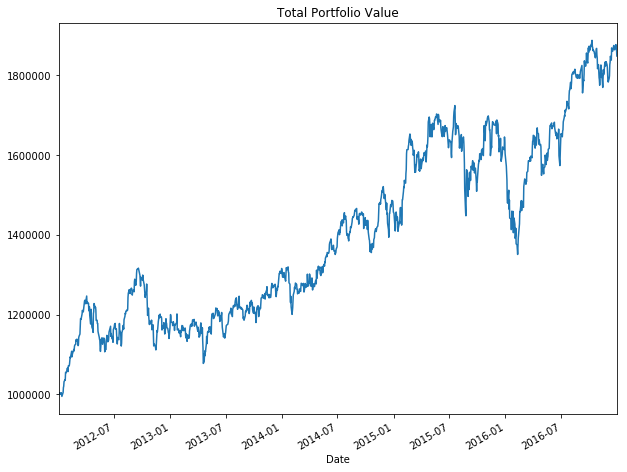

In [42]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value');

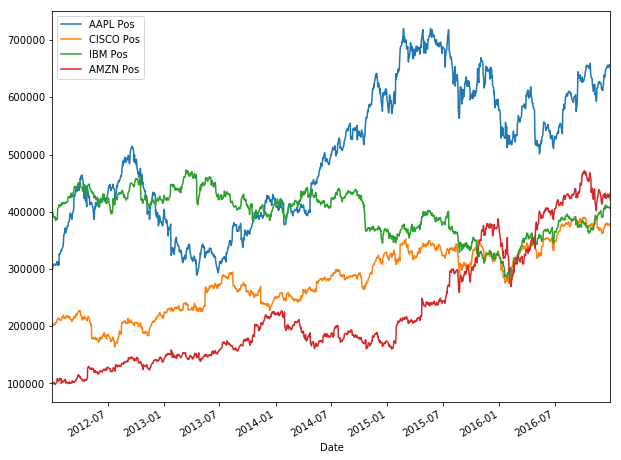

In [43]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8));

# Portfolio Allocation continued... 1

In [44]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [45]:
portfolio_val['Daily Returns'] = portfolio_val['Total Pos'].pct_change()
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Returns
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


### Average Daily Return

In [46]:
portfolio_val['Daily Returns'].mean()

0.00054423307162152791

### Standard Deviation

In [47]:
portfolio_val['Daily Returns'].std()

0.010568287769162552

### Plotting Daily Returns

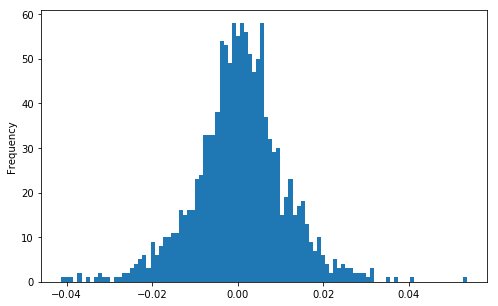

In [48]:
portfolio_val['Daily Returns'].plot(kind='hist', bins=100, figsize=(8,5));

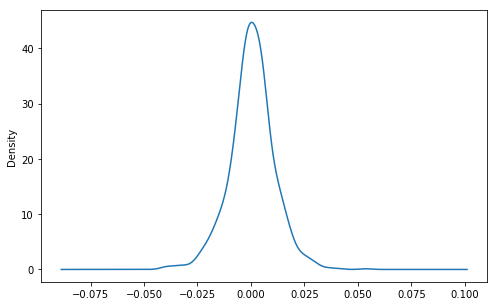

In [49]:
portfolio_val['Daily Returns'].plot(kind='kde', figsize=(8,5));

### Overall cumulative return

In [50]:
overall_cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)
overall_cum_ret

84.742851816654593

In [51]:
portfolio_val['Total Pos'][-1]

1847428.518166546

**Thus we have gained over 84.74% on our initial portfolio investment till date which amounts to 1847428.51 USD**

In [52]:
# Calculating sharpe ration assuming that risk_free return is zero.
sharpe_ratio = portfolio_val['Daily Returns'].mean() / portfolio_val['Daily Returns'].std()
sharpe_ratio

0.051496806626477189

**Therefore, our sharpe ratio is 0.054196806626477189**

In [53]:
# Calculating annualized sharpe ratio
annual_sharpe_ratio = (252**0.5) * sharpe_ratio
annual_sharpe_ratio

0.81748646188585039

**Therefore, our annualized sharpe ratio is 0.81748646188585039**

Sharpe ratio acceptable measures:
*  ratio >=1 and < 2    - **Good**
*  ratio >=2 and < 3    - **Very Good**
*  ratio >=3 and higher - **Excellent**

**The basic purpose of sharpe ratio is to allow investors to analyze how much greater a return here he or she is obtaining in relation to the level of additional risk taken to generate that return.**

# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

**Goal: Optimize the portfolio holding to obtain the best Sharpe ratio.**

* Below are some techniques
    - **Monto Carlo Simulation:** Guessing and checking a bunch of random allocations and see which one has the best Sharpe ratio.
    - **Optimization algorithms:** Using the method called as minimization, we attempt to minimize the negative Sharpe ratio.

### Marcos Portfolio Optimization
### Bullet (Efficient frontier)
[http://www.bfjlaward.com/pdf/26063/59-69_Lopez%20Color_JPM_0708.pdf]
___

<img src='efficient_frontier.png' />
___

# Portfolio Optimization continued... 1

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date', parse_dates=True)

In [56]:
aapl.head()

,Adj. Close
Date,
2012-01-03,53.063218
2012-01-04,53.348386
2012-01-05,53.940658
2012-01-06,54.504543
2012-01-09,54.418089


In [57]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis=1)
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn']
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [58]:
stocks.pct_change().mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [59]:
# Pearson correlation coefficient
# [https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php]
stocks.pct_change().corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


## Log Returns vs Arithmetic Returns

We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.

For a full analysis of why we use log returns, check [this great article](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).

In [60]:
# Arithmetic daily returns
stocks.pct_change().head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [61]:
# Logarithmic daily returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


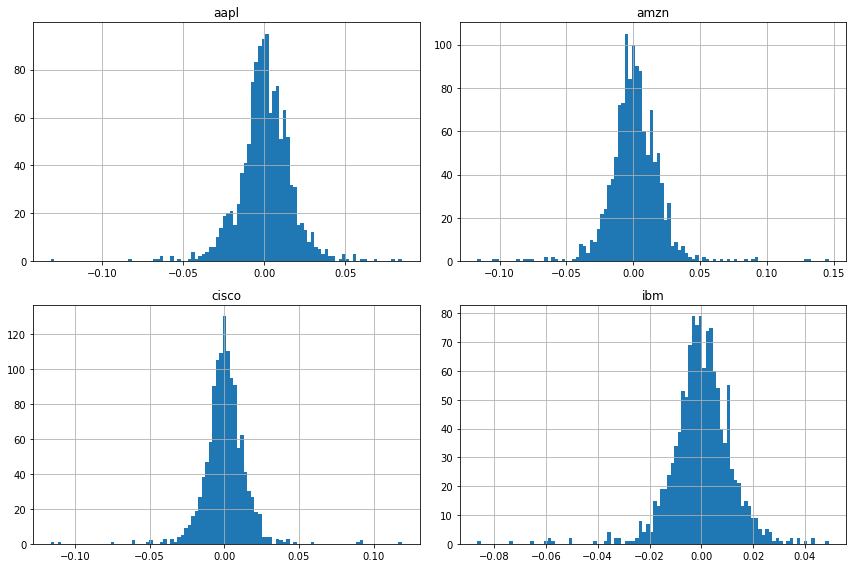

In [62]:
log_ret.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [63]:
# Mean of logarithmic returns
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [64]:
# Covariance of logarithmic returns
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


===========================================================

In [65]:
# resetting the random seed
np.random.seed(101)

# know the stocks
print(stocks.columns)

# create random allocation weights
weights = np.random.random(4)
print('Random weights: {}'.format(weights))

# rebalance the weights to add up to 1.0
weights = weights/np.sum(weights)
print('Rebalanced weights: {}'.format(weights))

# expected return
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print('Expected return: {}'.format(exp_ret))

# expected volatility
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print('Expected volatility: {}'.format(exp_vol))

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio: {}'.format(SR))

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random weights: [ 0.51639863  0.57066759  0.02847423  0.17152166]
Rebalanced weights: [ 0.40122278  0.44338777  0.02212343  0.13326603]
Expected return: 0.15599272049632004
Expected volatility: 0.18502649565909488
Sharpe Ratio: 0.8430831483926032


# Portfolio Optimization continued... 2

## Monte Carlo Simulation Method

In [66]:
# resetting the random seed
np.random.seed(101)

num_portfolios = 25000
all_weights = np.zeros((num_portfolios, len(stocks.columns)))
exp_ret_arr = np.zeros(num_portfolios)
exp_vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(4)
    weights = weights/np.sum(weights)
    
    all_weights[i,:] = weights
    
    exp_ret_arr[i] = np.sum((log_ret.mean() * weights) * 252)
    exp_vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sharpe_arr[i] = exp_ret_arr[i]/exp_vol_arr[i]

In [67]:
# maximum sharpe ratio obtained
sharpe_arr.max()

1.0303260551271067

In [68]:
# index of maximum sharpe ratio
sharpe_arr.argmax()

1420

In [69]:
# allocation weights at the maximum sharpe ratio
all_weights[1420, :]

array([ 0.26188068,  0.20759516,  0.00110226,  0.5294219 ])

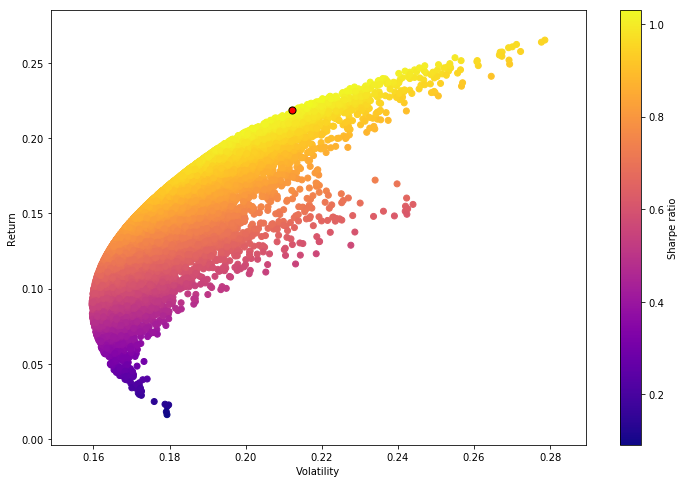

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(exp_vol_arr, exp_ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

max_sr_ret = exp_ret_arr[1420]
max_sr_vol = exp_vol_arr[1420]
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black');

## Additional homework

In [71]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [72]:
all_positions_returns = ((1 + stocks.pct_change()).cumprod() * all_weights[1420, :] * 1000000).dropna().sum(axis=1)
all_positions_returns[-1]

3173267.1639771275

In [73]:
100 * (all_positions_returns[-1] / all_positions_returns[0] - 1)

217.03520685521443

## Plotting the monte carlo best porfolio (26,21,0,53) vs default (30,20,10,40) (aapl, cisco, ibm, amzn)

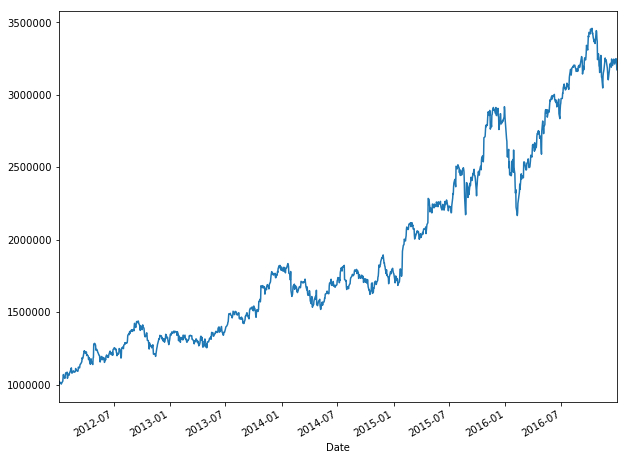

In [74]:
all_positions_returns.plot(figsize=(10,8));

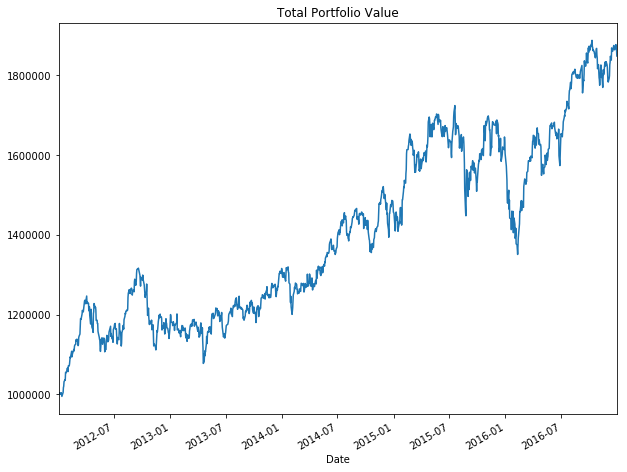

In [75]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value');

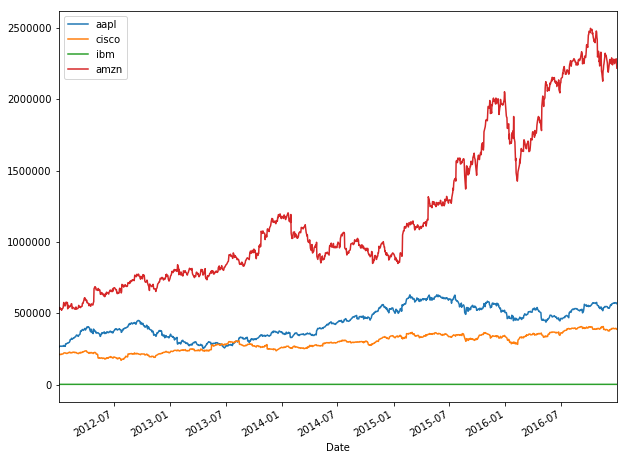

In [76]:
((1 + stocks.pct_change()).cumprod() * all_weights[1420, :] * 1000000).plot(figsize=(10,8));

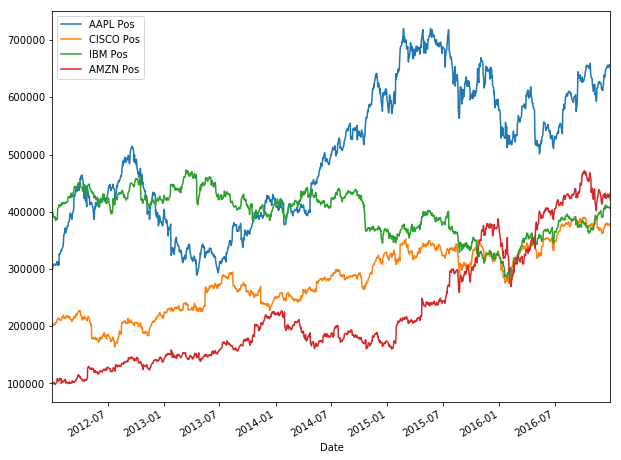

In [77]:
portfolio_val.drop(['Total Pos', 'Daily Returns'], axis=1).plot(figsize=(10,8));

# Portfolio Optimization continued... 3

## Optimization Algorithm Method
[https://docs.scipy.org/doc/scipy/reference/optimize.html]

In [78]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

In [79]:
from scipy.optimize import minimize

In [80]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

In [81]:
# Helper functions
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1.0

In [82]:
def check_sum(weights):
    # return 0 if the sum of the weights is 1
    return np.sum(weights) - 1.0

In [83]:
constraints = ({'type' : 'eq', 'fun' : check_sum})

# The (min, max) value bound of each portfolio allocation, essentially
# a number between 0 and 1
bounds = ((0,1),(0,1),(0,1),(0,1))

# initial allocation guess
init_guess = [0.25,0.25,0.25,0.25]

In [92]:
opt_results = minimize(fun=neg_sharpe, x0=init_guess, method='SLSQP', bounds=bounds, constraints=constraints)
opt_results

     fun: -1.0307168703347112
     jac: array([  5.64157963e-05,   4.18424606e-05,   3.39921728e-01,
        -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.26628977,  0.20418983,  0.        ,  0.5295204 ])

In [85]:
# best allocation portfolio
opt_results.x

array([ 0.26628977,  0.20418983,  0.        ,  0.5295204 ])

In [87]:
# returns array([returns, volatility, Sharpe ratio])
get_ret_vol_sr(opt_results.x)

array([ 0.21885915,  0.21233683,  1.03071687])

### Plotting the frontier

In [93]:
# Finding the frontier between the y value (expected log returns) 0 to 0.3
frontier_y = np.linspace(0, 0.3, 100)

def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]    # returns volatility

In [96]:
frontier_volatility = []

for possible_return in frontier_y:
    constraints = ({'type':'eq', 'fun':check_sum},
                  {'type':'eq', 'fun': lambda weights: get_ret_vol_sr(weights)[0] - possible_return})
    result = minimize(fun=minimize_vol,x0=init_guess,method='SLSQP', constraints=constraints)
    frontier_volatility.append(result['fun'])

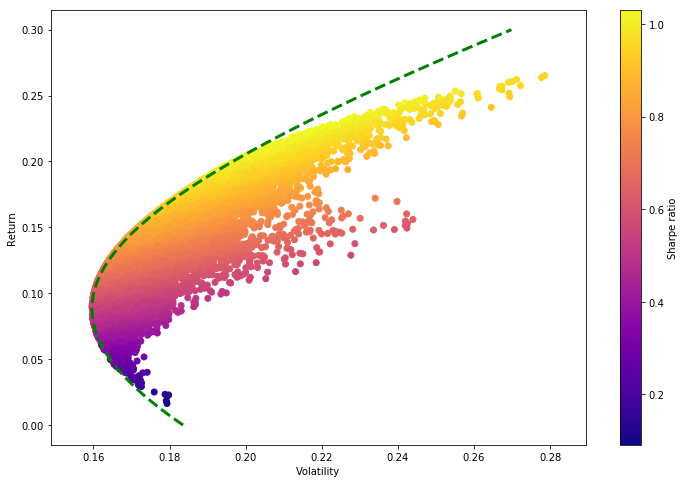

In [98]:
plt.figure(figsize=(12,8))
plt.scatter(exp_vol_arr, exp_ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3);

---------------------------------------------------------------------

# Key Financial Topics

* Type of Funds
* Order Books
* Latency Arbitrage (HFT)
* Short Selling

## Types of Funds

Three major types:
    1. ETF - Exchange Traded Funds
    2. Mutual Funds
    3. Hedge Funds

* **ETFs**
[http://www.investopedia.com/terms/e/etf.asp]

ETFs are exchange traded funds that are constituted of a basket of funds, bonds, commodities, securities etc. Their holding are completely public and transparent and individuals can buy trade the marketable security.

Typically people investing in ETFs are more intrested in a diversified portfolio and want to keep their investment in an ETF for a longer period of time. 

One of the most common ETFs is the Spider (SPY) which tracks the S&P500

* **Mutual Funds**
[http://www.investopedia.com/terms/m/mutualfund.asp]


A mutual fund is an investment vechicle made up of a pool of funds collected from many investors for the purpose of investing in securities such as stocks, bonds, money market instruments and similar assets.

Mutual funds are operated by money managers, whoc invest the fund's capital and attempt to produce captial gains and income for the fund's investors.

A mutual fund's portfolio is structured and maintained to match the investment objectives stated in its prospectus.

Mutual Funds disclose their holdings typically once a quarter, although this can vary by fund.

* **Hedge Funds**
[http://www.investopedia.com/terms/h/hedgefund.asp]


Hedge funds are alternative investments using pooled funds that employ numerous different strategies to earn active return, **or alpha**, for their investors.

Hedge funds may be aggressively managed or make use of deritives and leverage in both domestic and international markets with the goal of generating high returns (either in an absolute sense or over a specified market benchmark).

Essentially the goal of hedge funds is to beat the market, or beat the benchmarks.

**It is important to note that hedge funds are generally only accessible to accredited investors as they require less SEC regulations than other funds.**

One aspect that has set the hedge fund industry apart is the fact that hedge funds face less regulation than mutual funds and other investment vehicles.

### Fees associated with each?

* ETF Funds
    - Expense ratio - 0.01% - 1% (percentage of AUM (assets under management))


* Mutual Funds
    - Expense ratio - 0.5% - 3%


* Hedge Funds
    - 2% of fund. 20% of profits (2 and 20 rule)

### Liquidity associated with each?

* ETF Funds
    - Buy/Sell just like a stock.


* Mutual Funds
    - Buy/Sell at end of day through broker.


* Hedge Funds
    - Depends on agreement

## Order Books
[https://www.youtube.com/watch?v=N9hoqFpDjVs]
[http://www.investopedia.com/terms/o/order-book.asp]

Making an order includes the following:

* Buy or sell
* Symbol
* Number of shares
* LIMIT or MARKET
* Price (only needed for a LIMIT order)

Example orders:
    - BUY, AAPL, 200, MARKET
    - SELL, TSLA, 400, MARKET
    - BUY, AMD, 2000, LIMIT, 13.95
    - SELL, NVDA, 150, LIMIT, 160.99

* More information on the videos

## Short Selling
[http://www.investopedia.com/terms/s/shortselling.asp]

* More information on the videos

-----------------------------------------------------------

# CAPM - Capital Asset Pricing Model
[http://www.investopedia.com/terms/c/capm.asp]


Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $

### CAPM of a portfolio
## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [101]:
from scipy import stats

In [103]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero.
    stderr : float
        Standard error of the estimated gradient.
    
    See also
    --------
    :func:`scipy.optimize.curve_fit` : Use 

In [114]:
import pandas as pd
import pandas_datareader as web
import datetime

In [115]:
start = datetime.datetime(2010, 1, 4)
end = datetime.datetime(2017, 7, 25)
spy_etf = web.DataReader('SPY', 'google', start=start, end= end)

In [117]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-10-10 to 2017-10-06
Data columns (total 5 columns):
Open      250 non-null float64
High      250 non-null float64
Low       250 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [119]:
spy_etf.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-02,251.49,252.32,251.29,252.32,59022985
2017-10-03,252.46,252.89,252.23,252.86,66810169
2017-10-04,252.69,253.44,252.56,253.16,55953619
2017-10-05,253.54,254.68,253.20,254.66,63522757
2017-10-06,254.15,254.70,253.85,254.37,80645998


In [126]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [127]:
aapl = web.DataReader('AAPL','google',start,end)
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-10,115.02,116.75,114.72,116.05,36235956
2016-10-11,117.70,118.69,116.20,116.30,64041043
2016-10-12,117.35,117.98,116.75,117.34,37586787
2016-10-13,116.79,117.44,115.72,116.98,35192406
2016-10-14,117.88,118.17,117.13,117.63,35652191


In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

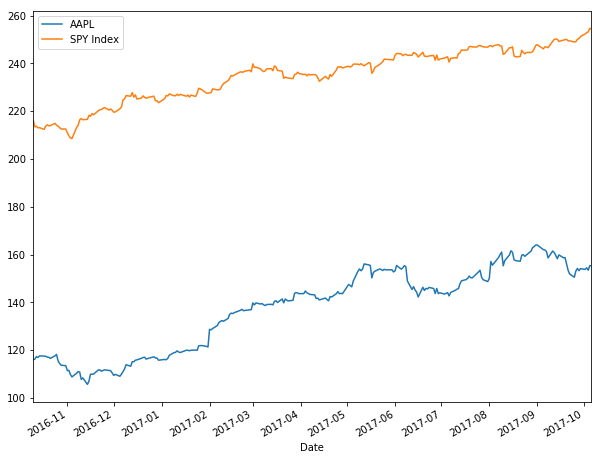

In [130]:
aapl['Close'].plot(label='AAPL', figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend();

In [131]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

In [135]:
aapl.head()

,Open,High,Low,Close,Volume,Cumulative
Date,,,,,,
2016-10-10,115.02,116.75,114.72,116.05,36235956,1.000000
2016-10-11,117.70,118.69,116.20,116.30,64041043,1.002154
2016-10-12,117.35,117.98,116.75,117.34,37586787,1.011116
2016-10-13,116.79,117.44,115.72,116.98,35192406,1.008014
2016-10-14,117.88,118.17,117.13,117.63,35652191,1.013615


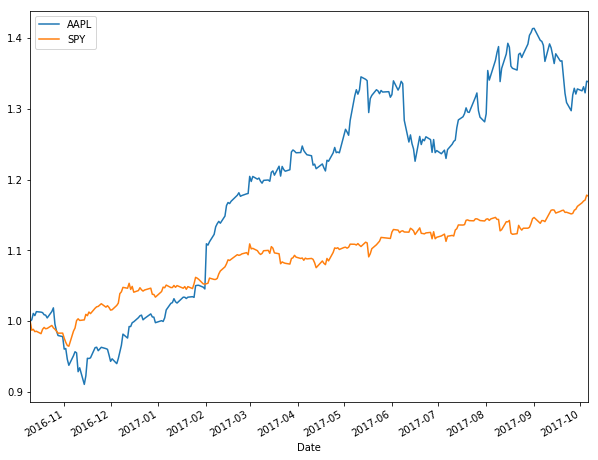

In [134]:
aapl['Cumulative'].plot(label='AAPL', figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend();

In [136]:
aapl['Daily Return'] = aapl['Close'].pct_change()
spy_etf['Daily Return'] = spy_etf['Close'].pct_change()

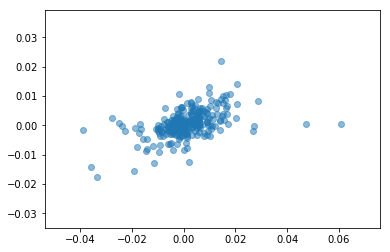

In [138]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.5);

In [140]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])
beta

0.21566065399157372

In [141]:
alpha

0.00039854839953421559

In [142]:
r_value

0.49087186338994626

**Conclusion:** Since, r_value aapl and spy_etf are not a good fit.

# Stock splits and dividends
[http://www.investopedia.com/walkthrough/corporate-finance/5/dividends/stock-dividends-splits.aspx]

**Conclusion:** Use the **Adjusted Close** instead of **Close**, as Adj. Close does take into account stock splits and dividends.

# Efficient Market Hypothesis
[http://www.investopedia.com/terms/e/efficientmarkethypothesis.asp]

* EMH is an investment theory that states it is impossible to **'beat the market'** because stock market efficiency causes existing share prices to always incorporate and reflect all relevant information.

* According to the EMH, stocks always trade at their fair value on stock exchanges, making it impossible for investors to either purchase undervalued stocks or sell stocks for inflated prices.

* As such, it should be impossible to outperform the overall market through expert stock selection or market timing, and the only way an investor can possibly obtain higher returns is by purchasing riskier investments.

* So is the EMH true?

* The success of different strategies and hedge funds implies the strongest interpretation of EMH is probably not true.

* There are also events that have shown the market to be overvalued at certain points in history (financial crises, dot com bubble, etc)

* While some aspects of EMH certainly are true, especially as information is more widely acceptable, we will continue on with the assumption that the market is not 100% efficient!